# Лабораторная работа 1

**Тема**: Создание "Истории о данных"

**Курс**: Методы машинного обучения

**Группа**: ИУ5-23М

**Студент**: Костарев А. П.

## Цель

Изучение различных методов визуализация данных и создание истории на основе данных.

## Задание

1.	Выбрать набор данных (датасет). Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.


2.	Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
  -	История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
  -	На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
  -	Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
  -	Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
  -	История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.

3.	Сформировать отчет и разместить его в своем репозитории на github.


## Выполнение задания

### Текстовое описание датасета

В качестве датасета будем использовать набор данных, содержащий данные о смартфонах. Данный набор доступен по адресу: https://www.kaggle.com/datasets/informrohit1/smartphones-dataset

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

### Загрузка данных

In [3]:
data = pd.read_csv("smartphones_cleaned_v6.csv")

### Основные характеристики датасета

Выведем первые строки

In [32]:
data.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.00,True,True,False,snapdragon,8.00,3.20,...,120,3,1.00,android,50.00,16.00,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.00,True,False,False,snapdragon,8.00,2.20,...,120,3,1.00,android,64.00,16.00,1,1024.00,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.00,True,False,False,exynos,8.00,2.40,...,90,3,1.00,android,50.00,13.00,1,1024.00,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.00,True,False,False,snapdragon,8.00,2.20,...,120,3,1.00,android,50.00,16.00,1,1024.00,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.00,True,False,False,dimensity,8.00,2.60,...,120,3,1.00,android,108.00,16.00,0,NaN,1080,2412


In [5]:
data.shape

(980, 26)

In [6]:
data.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.00,879.00,974.00,938.00,969.00,980.00,769.00,980.00,980.00,980.00,980.00,980.00,976.00,980.00,975.00,980.00,500.00,980.00,980.00
mean,32520.50,78.26,7.77,2.43,4817.75,0.85,46.13,6.56,141.04,6.54,92.26,2.81,1.03,50.32,16.59,0.63,736.06,1075.85,2214.66
std,39531.81,7.40,0.84,0.46,1009.54,0.35,34.28,2.74,107.13,0.35,28.99,0.78,0.17,33.00,10.88,0.48,366.89,290.16,516.48
min,3499.00,60.00,4.00,1.20,1821.00,0.00,10.00,1.00,8.00,3.54,60.00,1.00,1.00,2.00,0.30,0.00,32.00,480.00,480.00
25%,12999.00,74.00,8.00,2.05,4500.00,1.00,18.00,4.00,64.00,6.50,60.00,2.00,1.00,24.00,8.00,0.00,512.00,1080.00,1612.00
50%,19994.50,80.00,8.00,2.30,5000.00,1.00,33.00,6.00,128.00,6.58,90.00,3.00,1.00,50.00,16.00,1.00,1024.00,1080.00,2400.00
75%,35491.50,84.00,8.00,2.84,5000.00,1.00,66.00,8.00,128.00,6.67,120.00,3.00,1.00,64.00,16.00,1.00,1024.00,1080.00,2408.00
max,650000.00,89.00,8.00,3.22,22000.00,1.00,240.00,18.00,1024.00,8.03,240.00,4.00,2.00,200.00,60.00,1.00,2048.00,2460.00,3840.00


In [13]:
data.corr(numeric_only=True)

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.00,0.28,0.31,0.47,-0.02,-0.05,0.47,-0.16,0.12,0.28,...,0.11,0.24,0.13,0.12,0.09,0.16,-0.45,0.09,0.34,0.35
rating,0.28,1.00,0.60,0.47,0.16,0.20,0.63,-0.02,0.54,0.53,...,0.30,0.61,0.52,0.13,0.56,0.58,-0.42,0.35,0.43,0.69
has_5g,0.31,0.60,1.00,0.48,0.11,0.14,0.61,-0.01,0.36,0.44,...,0.23,0.61,0.21,0.06,0.35,0.36,-0.51,0.39,0.30,0.50
has_nfc,0.47,0.47,0.48,1.00,-0.03,0.03,0.61,-0.11,0.24,0.38,...,0.10,0.41,0.17,0.07,0.13,0.29,-0.56,0.19,0.34,0.43
has_ir_blaster,-0.02,0.16,0.11,-0.03,1.00,0.12,0.10,0.06,0.17,0.19,...,0.14,0.18,0.20,-0.01,0.24,0.01,-0.04,-0.06,0.16,0.20
num_cores,-0.05,0.20,0.14,0.03,0.12,1.00,0.19,0.24,0.36,0.12,...,0.39,0.23,0.34,0.05,0.31,0.22,0.07,0.20,0.14,0.27
processor_speed,0.47,0.63,0.61,0.61,0.10,0.19,1.00,-0.04,0.35,0.62,...,0.29,0.56,0.26,0.12,0.28,0.40,-0.66,0.26,0.37,0.55
battery_capacity,-0.16,-0.02,-0.01,-0.11,0.06,0.24,-0.04,1.00,0.13,-0.08,...,0.35,0.09,0.16,-0.07,0.17,-0.01,0.17,0.24,-0.02,0.04
fast_charging_available,0.12,0.54,0.36,0.24,0.17,0.36,0.35,0.13,1.00,NaN,...,0.35,0.42,0.47,0.07,0.43,0.33,-0.17,0.33,0.32,0.51
fast_charging,0.28,0.53,0.44,0.38,0.19,0.12,0.62,-0.08,NaN,1.00,...,0.26,0.55,0.13,0.01,0.39,0.39,-0.56,0.03,0.22,0.33


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

Определим уникальные значения для целевого признака (операционная система):



In [15]:
data['os'].unique()

array(['android', 'ios', 'other', nan], dtype=object)

Целевой признак содержит только  4 значения.

### Визуальное исследование датасета

Диаграмма рассеяния - распределение двух столбцов данных и отображение визуальной зависимости между ними:

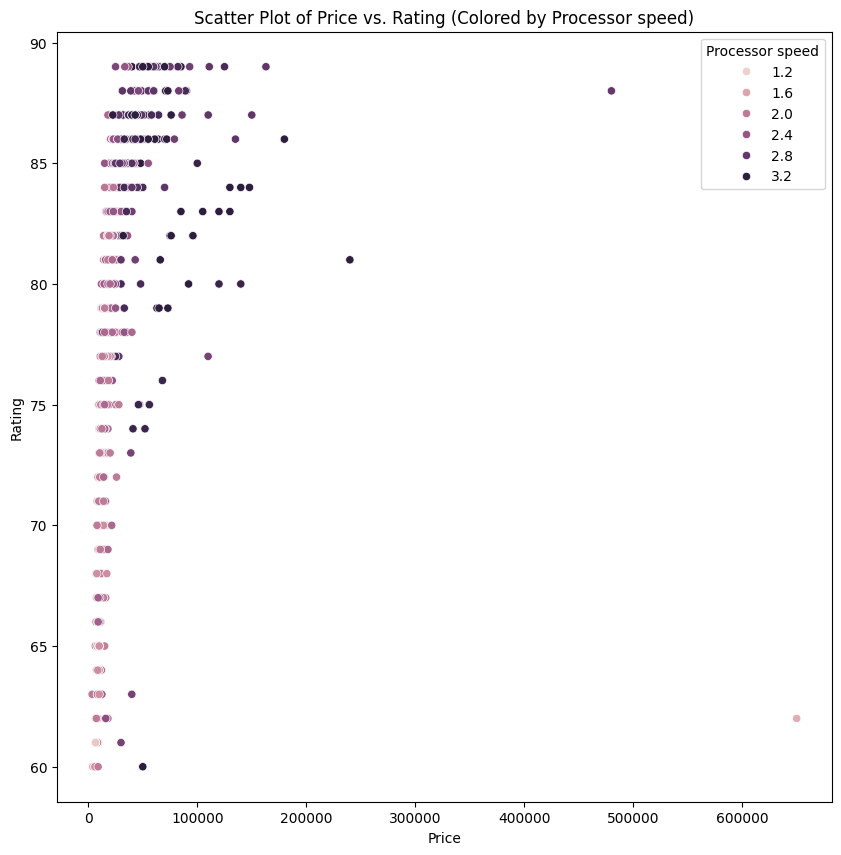

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='price', y='rating', hue='processor_speed', data=data)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Price vs. Rating (Colored by Processor speed)')
plt.legend(title='Processor speed',loc = "best")
plt.show()

Гистограмма отображает плотность вероятности распределения данных:

<Axes: xlabel='processor_speed', ylabel='Density'>

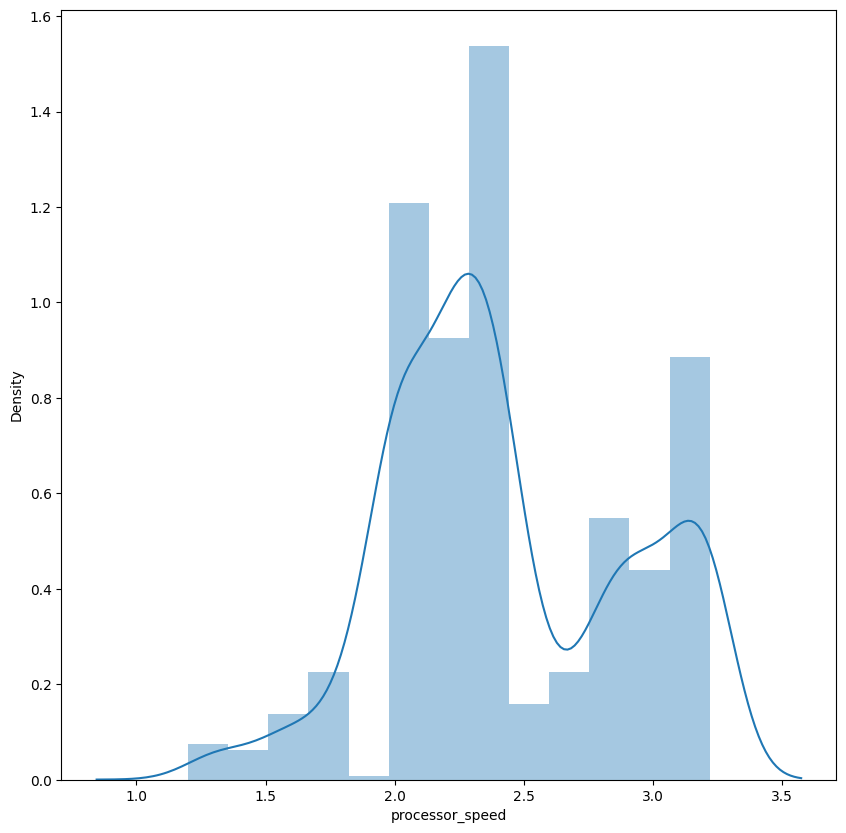

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data['processor_speed'])

Комбинация гистограмм и диаграмм рассеивания выполняется с помощью jointplot:

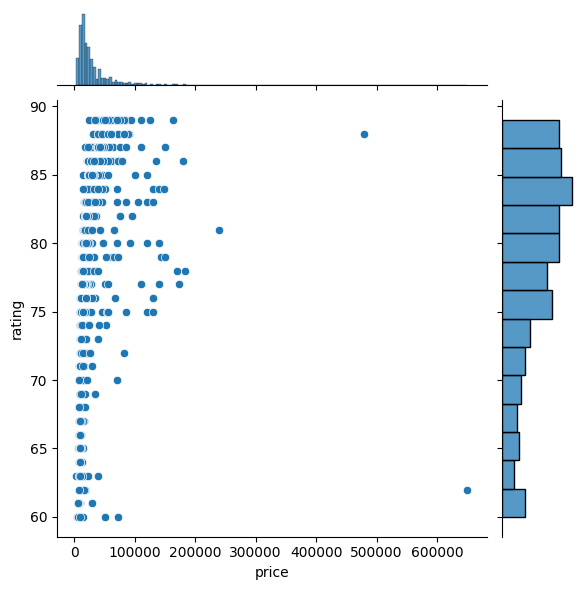

In [22]:
sns.jointplot(x='price', y='rating', data=data)

Данные можно представить в виде парных диаграмм - матрицы графиков:

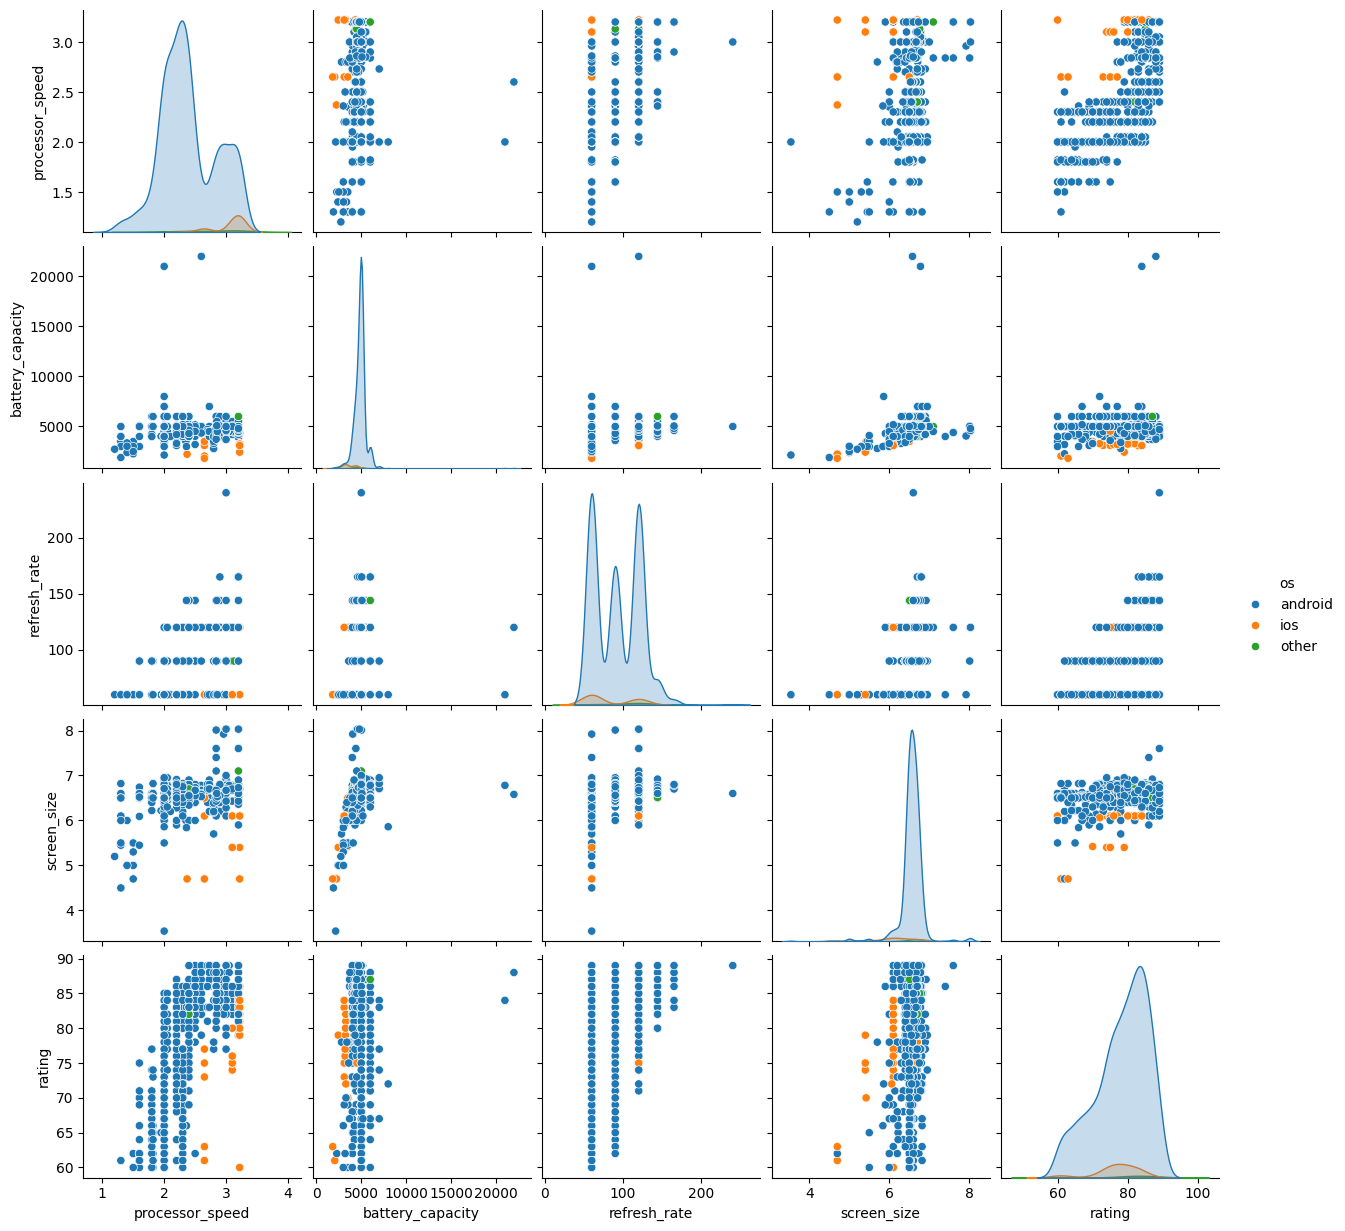

In [33]:
sns.pairplot(data[["processor_speed", "battery_capacity", "refresh_rate", "screen_size", "rating", "os"]], hue="os")

Отображение в виде "Ящика с усами":

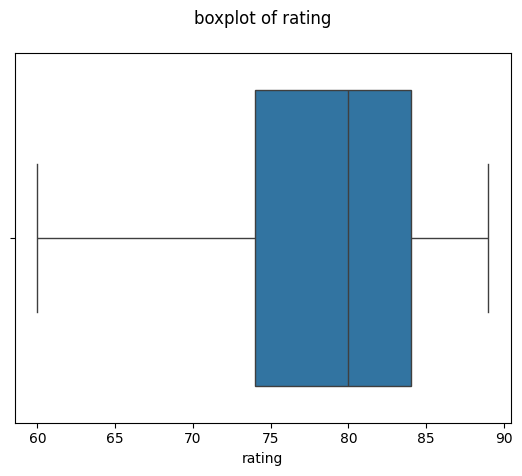

In [34]:
sns.boxplot(data=data,x='rating')
plt.title('boxplot of rating\n')
plt.show()

<Axes: xlabel='num_cores', ylabel='processor_speed'>

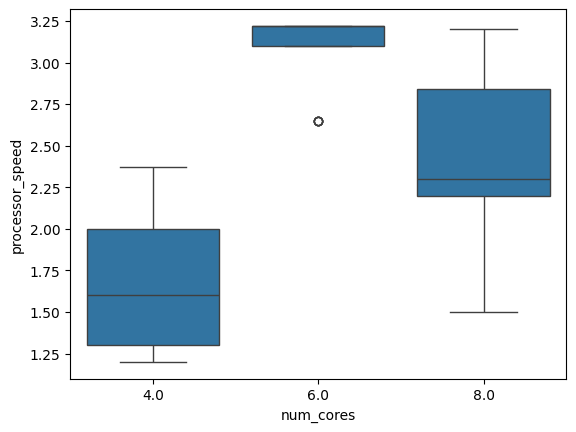

In [35]:
sns.boxplot(x='num_cores', y='processor_speed', data=data)

Он показывает мощность процессора в зависимости от количества ядер.

Violin Plot дополнительно показывает распределение плотности:

<Axes: xlabel='num_cores', ylabel='processor_speed'>

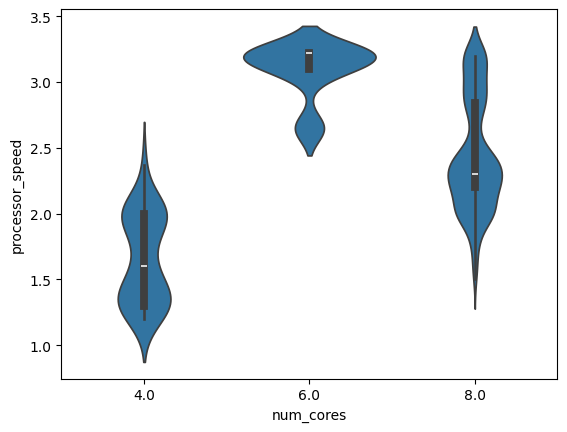

In [36]:
sns.violinplot(x='num_cores', y='processor_speed', data=data)

In [43]:
average_refresh_rate_screen_size = data.groupby(['refresh_rate', 'os'])['screen_size'].mean().unstack()
average_refresh_rate_screen_size

os,android,ios,other
refresh_rate,,,
60,6.44,5.86,6.39
90,6.54,NaN,6.73
120,6.67,6.45,6.74
144,6.66,NaN,6.51
165,6.76,NaN,NaN
240,6.60,NaN,NaN


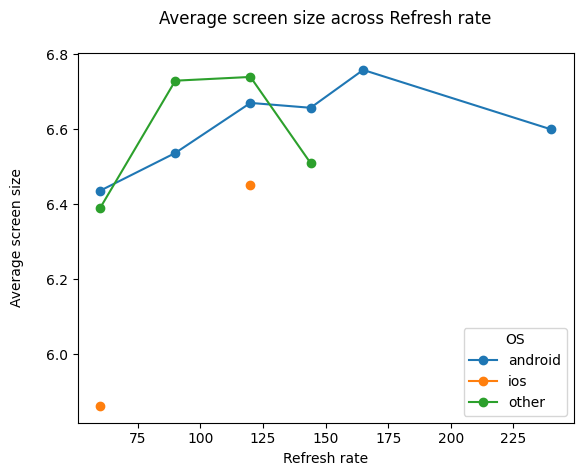

In [45]:
average_refresh_rate_screen_size.plot(marker='o')
plt.xlabel('Refresh rate')
plt.ylabel('Average screen size\n')
plt.title('Average screen size across Refresh rate\n')
plt.legend(title='OS')
plt.show()

Показывает как средний показатель размера экрана варьируется в зависимости от операционной системы и размера экрана

Text(0.5, 1.0, 'Top 6 refresh rate\n')

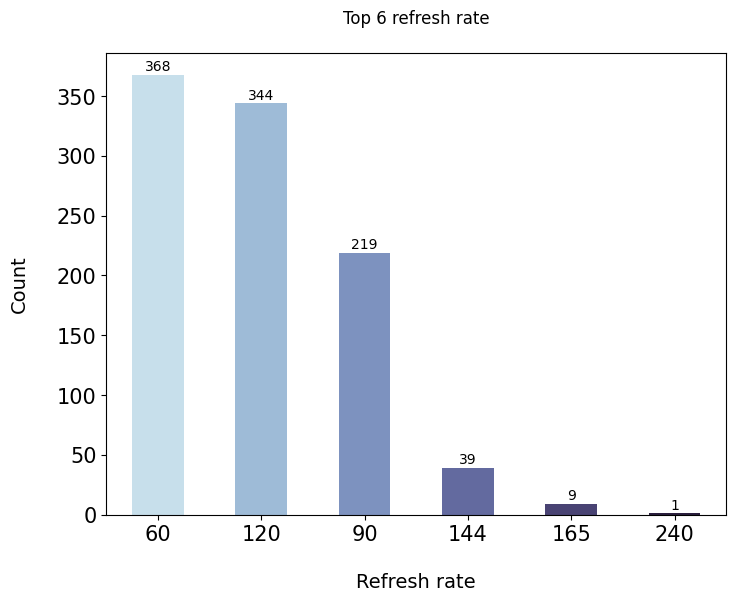

In [47]:
plt.figure(figsize = (8, 6))
ax = data["refresh_rate"].value_counts().head(10).plot(kind = 'bar', color = sns.color_palette("ch:s=.25,rot=-.25"), rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Refresh rate', fontsize = 14, labelpad = 20)
plt.ylabel('Count', fontsize = 14, labelpad = 20);
plt.title('Top 6 refresh rate\n')

Топ 6 частот обновления дисплея

<Axes: ylabel='count'>

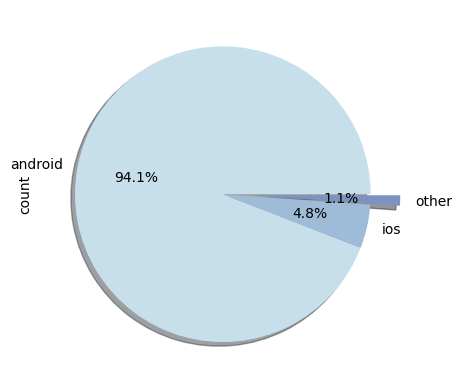

In [48]:
data.os.value_counts().plot(kind="pie",autopct="%0.1f%%",explode=[0,0,0.2],shadow=True,
                              colors=sns.color_palette("ch:s=.25,rot=-.25"))

Процент смартфоном использующих ту или иную ОС

### Информация о корреляции признаков

Проверка корреляции помогает найти корреляции с целевом признаком (информативные для машинного обучения), а также выявить линейно независимые нецелевые признаки.

Построим корреляционную матрицу:

In [49]:
data.corr(numeric_only=True)

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.00,0.28,0.31,0.47,-0.02,-0.05,0.47,-0.16,0.12,0.28,...,0.11,0.24,0.13,0.12,0.09,0.16,-0.45,0.09,0.34,0.35
rating,0.28,1.00,0.60,0.47,0.16,0.20,0.63,-0.02,0.54,0.53,...,0.30,0.61,0.52,0.13,0.56,0.58,-0.42,0.35,0.43,0.69
has_5g,0.31,0.60,1.00,0.48,0.11,0.14,0.61,-0.01,0.36,0.44,...,0.23,0.61,0.21,0.06,0.35,0.36,-0.51,0.39,0.30,0.50
has_nfc,0.47,0.47,0.48,1.00,-0.03,0.03,0.61,-0.11,0.24,0.38,...,0.10,0.41,0.17,0.07,0.13,0.29,-0.56,0.19,0.34,0.43
has_ir_blaster,-0.02,0.16,0.11,-0.03,1.00,0.12,0.10,0.06,0.17,0.19,...,0.14,0.18,0.20,-0.01,0.24,0.01,-0.04,-0.06,0.16,0.20
num_cores,-0.05,0.20,0.14,0.03,0.12,1.00,0.19,0.24,0.36,0.12,...,0.39,0.23,0.34,0.05,0.31,0.22,0.07,0.20,0.14,0.27
processor_speed,0.47,0.63,0.61,0.61,0.10,0.19,1.00,-0.04,0.35,0.62,...,0.29,0.56,0.26,0.12,0.28,0.40,-0.66,0.26,0.37,0.55
battery_capacity,-0.16,-0.02,-0.01,-0.11,0.06,0.24,-0.04,1.00,0.13,-0.08,...,0.35,0.09,0.16,-0.07,0.17,-0.01,0.17,0.24,-0.02,0.04
fast_charging_available,0.12,0.54,0.36,0.24,0.17,0.36,0.35,0.13,1.00,NaN,...,0.35,0.42,0.47,0.07,0.43,0.33,-0.17,0.33,0.32,0.51
fast_charging,0.28,0.53,0.44,0.38,0.19,0.12,0.62,-0.08,NaN,1.00,...,0.26,0.55,0.13,0.01,0.39,0.39,-0.56,0.03,0.22,0.33


Выше была построена матрица корреляции по Пирсону, но также можно построить матрицы по критерию Кендалла и Спирмена.

In [51]:
data.corr(method='kendall', numeric_only=True)

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.00,0.62,0.54,0.57,0.02,-0.01,0.61,-0.24,0.33,0.49,...,0.22,0.45,0.25,0.12,0.29,0.43,-0.54,0.28,0.51,0.45
rating,0.62,1.00,0.50,0.43,0.11,0.11,0.50,-0.19,0.39,0.49,...,0.24,0.50,0.33,0.12,0.45,0.55,-0.38,0.27,0.44,0.42
has_5g,0.54,0.50,1.00,0.48,0.11,0.07,0.52,-0.09,0.36,0.42,...,0.25,0.58,0.17,0.06,0.32,0.38,-0.51,0.38,0.40,0.44
has_nfc,0.57,0.43,0.48,1.00,-0.03,-0.06,0.50,-0.23,0.24,0.34,...,0.19,0.38,0.15,0.07,0.13,0.29,-0.56,0.19,0.42,0.36
has_ir_blaster,0.02,0.11,0.11,-0.03,1.00,0.13,0.09,0.16,0.17,0.17,...,0.13,0.18,0.19,-0.01,0.20,0.10,-0.04,-0.04,0.17,0.12
num_cores,-0.01,0.11,0.07,-0.06,0.13,1.00,0.04,0.26,0.32,0.15,...,0.19,0.20,0.29,0.05,0.37,0.24,0.15,0.19,0.03,0.08
processor_speed,0.61,0.50,0.52,0.50,0.09,0.04,1.00,-0.14,0.29,0.50,...,0.26,0.45,0.17,0.11,0.23,0.36,-0.55,0.23,0.41,0.39
battery_capacity,-0.24,-0.19,-0.09,-0.23,0.16,0.26,-0.14,1.00,0.09,-0.18,...,0.23,0.05,0.08,-0.14,0.12,-0.10,0.27,0.15,-0.15,-0.00
fast_charging_available,0.33,0.39,0.36,0.24,0.17,0.32,0.29,0.09,1.00,NaN,...,0.24,0.40,0.41,0.07,0.43,0.39,-0.17,0.32,0.37,0.41
fast_charging,0.49,0.49,0.42,0.34,0.17,0.15,0.50,-0.18,NaN,1.00,...,0.29,0.50,0.13,0.05,0.37,0.48,-0.50,0.04,0.35,0.30


In [50]:
data.corr(method='spearman', numeric_only=True)

,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.00,0.77,0.66,0.69,0.03,-0.00,0.79,-0.32,0.41,0.65,...,0.30,0.56,0.33,0.14,0.37,0.56,-0.66,0.35,0.63,0.61
rating,0.77,1.00,0.60,0.51,0.13,0.13,0.66,-0.26,0.47,0.65,...,0.33,0.62,0.42,0.15,0.57,0.68,-0.46,0.33,0.55,0.57
has_5g,0.66,0.60,1.00,0.48,0.11,0.07,0.61,-0.10,0.36,0.49,...,0.30,0.62,0.18,0.06,0.36,0.43,-0.51,0.41,0.43,0.51
has_nfc,0.69,0.51,0.48,1.00,-0.03,-0.06,0.59,-0.26,0.24,0.40,...,0.22,0.41,0.15,0.07,0.14,0.32,-0.56,0.20,0.45,0.42
has_ir_blaster,0.03,0.13,0.11,-0.03,1.00,0.13,0.10,0.18,0.17,0.20,...,0.16,0.19,0.20,-0.01,0.23,0.11,-0.04,-0.04,0.18,0.14
num_cores,-0.00,0.13,0.07,-0.06,0.13,1.00,0.05,0.29,0.32,0.18,...,0.23,0.22,0.31,0.05,0.41,0.27,0.15,0.20,0.04,0.09
processor_speed,0.79,0.66,0.61,0.59,0.10,0.05,1.00,-0.19,0.34,0.64,...,0.35,0.55,0.21,0.13,0.30,0.47,-0.64,0.27,0.49,0.50
battery_capacity,-0.32,-0.26,-0.10,-0.26,0.18,0.29,-0.19,1.00,0.10,-0.24,...,0.30,0.07,0.09,-0.16,0.16,-0.13,0.31,0.17,-0.18,-0.01
fast_charging_available,0.41,0.47,0.36,0.24,0.17,0.32,0.34,0.10,1.00,NaN,...,0.29,0.43,0.44,0.07,0.48,0.44,-0.17,0.34,0.40,0.47
fast_charging,0.65,0.65,0.49,0.40,0.20,0.18,0.64,-0.24,NaN,1.00,...,0.41,0.61,0.16,0.06,0.47,0.59,-0.59,0.05,0.43,0.39


Для визуализации корреляционных матриц используют тепловую карту:

<Axes: >

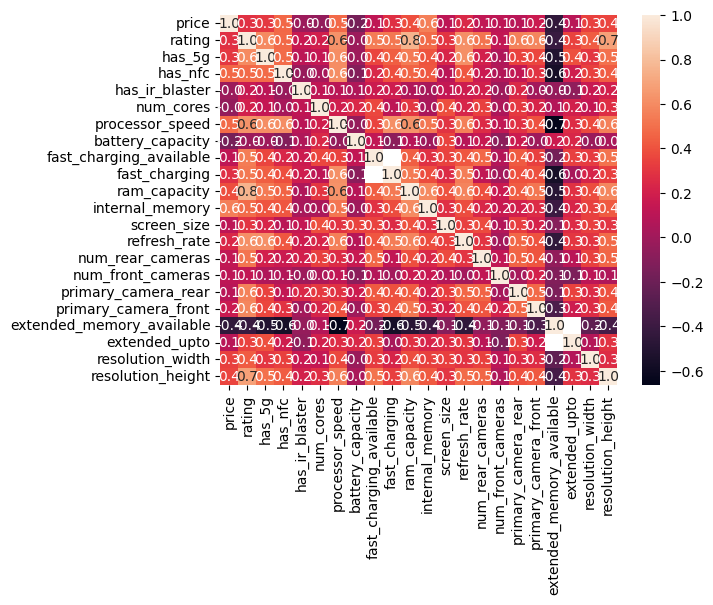

In [52]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.1f')

Text(0.5, 0.98, 'Корреляционные матрицы, построенные методами Пирсона, Кендалла и Спирмана')

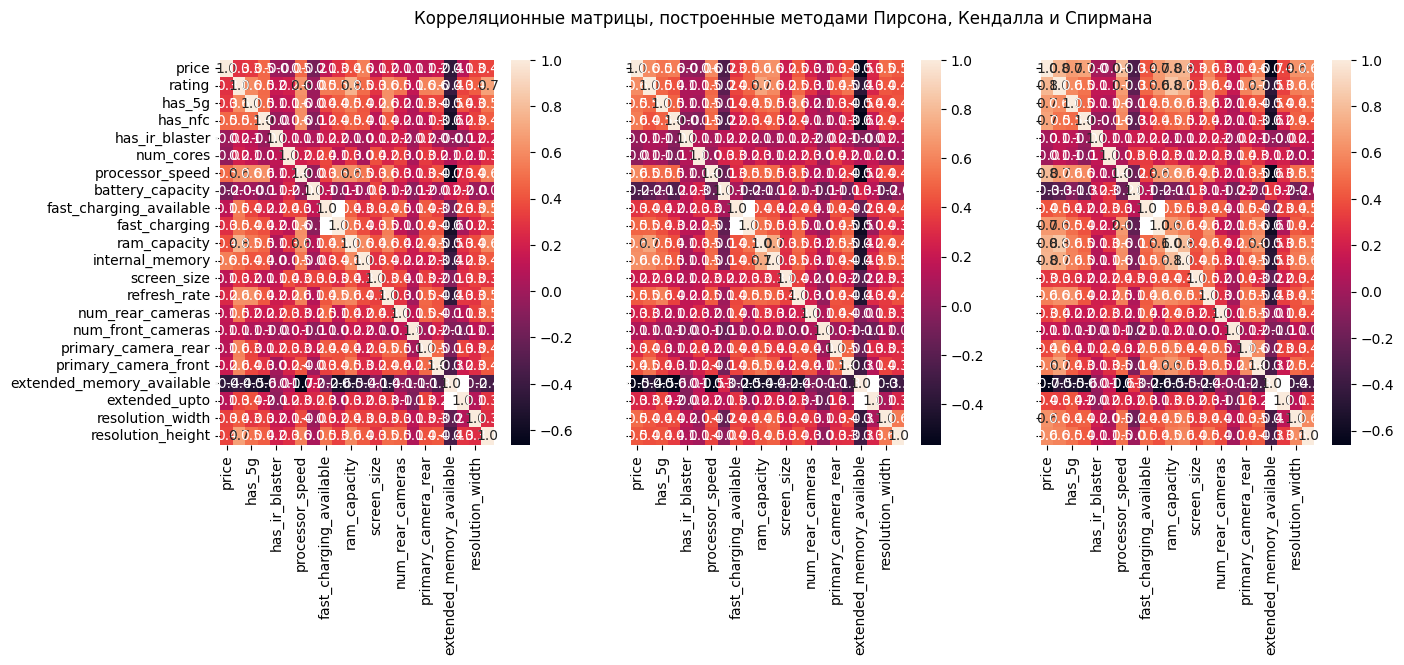

In [53]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson', numeric_only=True), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='kendall', numeric_only=True), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='spearman', numeric_only=True), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные методами Пирсона, Кендалла и Спирмана')

Также можно вывести треугольную матрицу:

<Axes: >

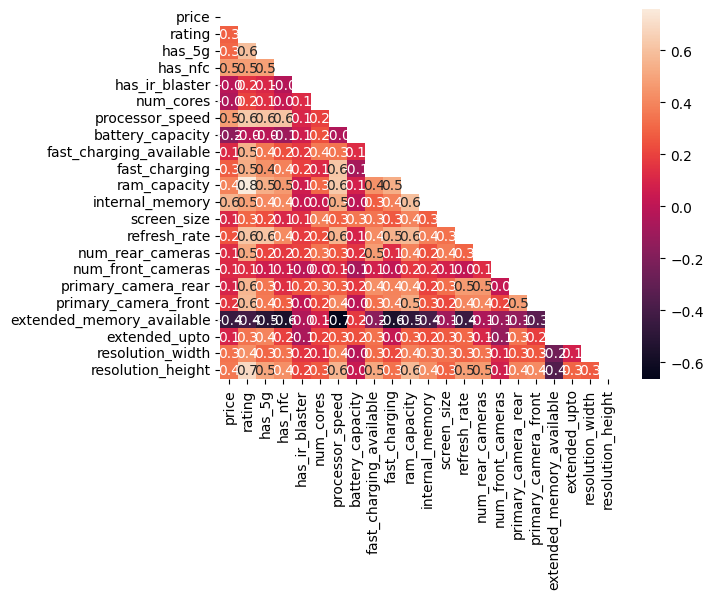

In [55]:
mask = np.zeros_like(data.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(numeric_only=True), mask=mask, annot=True, fmt='.1f')